## Open a dataset

In [1]:
import pandas as pd

fn = "../data/benchmarks/diffeq/predpreyfrac_clean.csv"
df = pd.read_csv(fn, skipinitialspace=True)
print df.columns

Index([u'T', u'x', u'y', u'dx', u'dy'], dtype='object')


## Graph the data

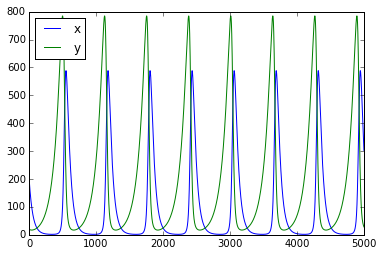

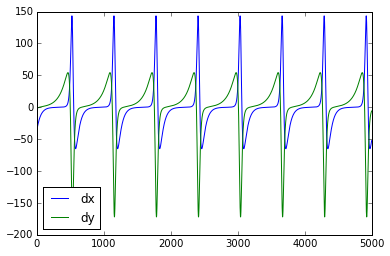

In [2]:
# visualization libraries
import matplotlib.pyplot as plt
# plot the visuals in ipython
%matplotlib inline

df[["x","y"]].plot()
df[["dx","dy"]].plot()
print ""

In [5]:
from pypge import (evaluate, model)
import sympy

X_train = df[["x", "y"]].as_matrix().T
Y_train = df[["dx"]].as_matrix().reshape(5000,)

print X_train.shape, Y_train.shape

xs = sympy.symbols("x y")

eqn_str = '-0.2*x + 0.001*x*y'
# eqn_str = "C*x + C*x*y"
eqn = sympy.sympify(eqn_str)

modl = model.Model(eqn, xs)

y_pred = evaluate.Eval(modl, xs, X_train)
print y_pred.shape, Y_train.shape

mae, err = evaluate.Score(Y_train, y_pred, "rmse")
print mae, err


(2, 5000) (5000,)
(5000,) (5000,)
0.0198915007578 None
